___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
import cufflinks as cf

In [34]:
cf.go_offline()

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [35]:
data = pd.read_csv('KNN_Project_Data')

In [36]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


**Check the head of the dataframe.**

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

In [37]:
data.iplot(kind='hist')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [38]:
from sklearn.preprocessing import StandardScaler


scaler= StandardScaler()

** Create a StandardScaler() object called scaler.**

In [39]:
scaler.fit(data.drop('TARGET CLASS',axis=1))

StandardScaler()

** Fit scaler to the features.**

In [40]:
scaled_data =scaler.transform(data.drop("TARGET CLASS",axis=1))

**Use the .transform() method to transform the features to a scaled version.**

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [41]:
df_feat=pd.DataFrame(scaled_data,columns=data.columns[:-1])

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X=df_feat
y=data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [44]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [45]:
knn=KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [46]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [47]:
pridicted_values=knn.predict(X_test)

/home/blood/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



** Create a confusion matrix and classification report.**

In [48]:
from sklearn.metrics import confusion_matrix,classification_report


confusion_matrix(y_test,pridicted_values)


array([[115,  47],
       [ 48, 120]])

In [49]:
print(classification_report(y_test,pridicted_values))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       162
           1       0.72      0.71      0.72       168

    accuracy                           0.71       330
   macro avg       0.71      0.71      0.71       330
weighted avg       0.71      0.71      0.71       330



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [50]:
errer_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pridict_i=knn.predict(X_test)
    errer_rate.append(np.mean(pridict_i != y_test))


/home/blood/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/home/blood/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this wa

**Now create the following plot using the information from your for loop.**

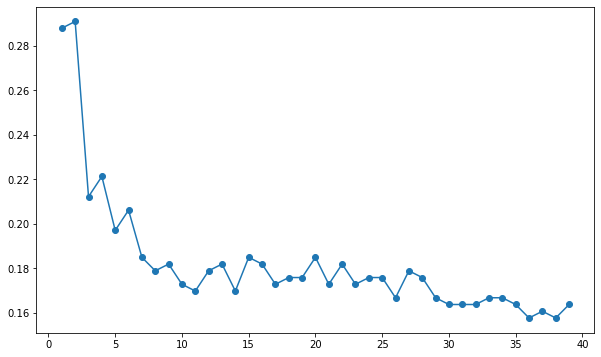

In [68]:

plt.figure(figsize=(10,6))
plt.plot(range(1,40),errer_rate,marker='o')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

# Great Job!